D:\LenovoSoftstore\anaconda3\envs\ag\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels\ag-20240412_083758"
Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240412_083758"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
CPU Count:          12
Memory Avail:       2.00 GB / 15.37 GB (13.0%)
Disk Space Avail:   22.54 GB / 375.69 GB (6.0%)
Train Data Rows:    140
Train Data Columns: 2
Label Column:       Label
AutoGluon infers your prediction problem is: 'bi

ValueError: num must be an integer with 1 <= num <= 6, not 7

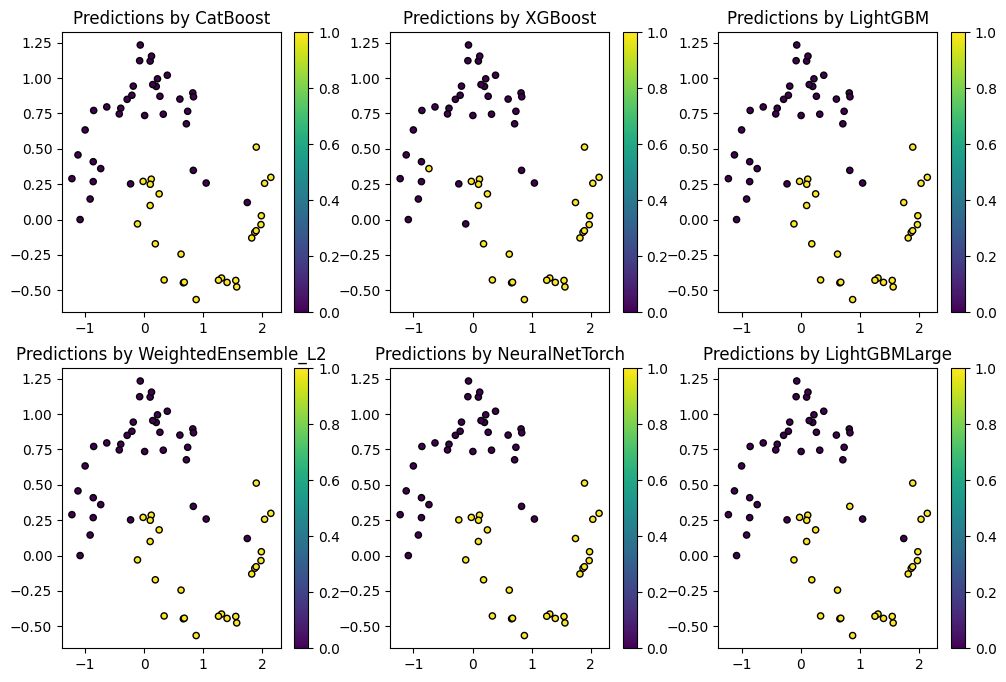

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 12 16:36:47 2024

@author: Hailing Lu
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

# 生成数据集
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建DataFrame
train_data = pd.DataFrame(X_train, columns=['Feature1', 'Feature2'])
train_data['Label'] = y_train
test_data = pd.DataFrame(X_test, columns=['Feature1', 'Feature2'])
test_data['Label'] = y_test

# 使用AutoGluon训练多个模型
predictor = TabularPredictor(label='Label').fit(train_data=train_data, presets='medium_quality_faster_train')

# 获取模型列表
leaderboard = predictor.leaderboard(silent=True)
models = leaderboard['model'].tolist()

# 对测试数据进行预测并画图
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
for i, model in enumerate(models):
    predictions = predictor.predict(test_data.drop(columns=['Label']), model=model)
    plt.subplot(2, 3, i+1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', edgecolor='k', s=20)
    plt.title(f'Predictions by {model}')
    plt.colorbar()

plt.tight_layout()
plt.show()
